YouTube per-CPU CGroup residency analysis
=======================
This is a run of experiments/run_youtube.py with the cgroups module enabled.
This notebook parses and plots the trace.html

In [1]:
#!/usr/bin/env python
%pylab inline
import trappy
from trace import Trace
import logging
import pandas as pd
import numpy as np
import os

from conf import LisaLogging
LisaLogging.setup(level=logging.ERROR)
logging.info('#### Setup FTrace')
path_to_html = "/home/joelaf/repo/lisa-aosp/external/lisa/results/YouTube_cgroups/trace.html"

Populating the interactive namespace from numpy and matplotlib


In [2]:
tr = Trace(None, path_to_html,
           cgroup_info = { 
               'cgroups': ['foreground', 'background', 'system-background', 'top-app', 'rt'],
               'controller_ids': { 4: 'cpuset', 2: 'schedtune' }
           },
           events=[ 'sched_switch', 'cgroup_attach_task_devlib', 'cgroup_attach_task', 'sched_process_fork' ],
           normalize_time=False)

Total amount of time spent per Cgroup (schedtune)
===========================
(NaN is the idle task)

In [3]:
tr.data_frame.cpu_residencies_cgroup('schedtune')

,cpu_0,cpu_1,cpu_2,cpu_3,cpu_4,cpu_5,cpu_6,cpu_7,total
schedtune,,,,,,,,,
background,0.633808,0.587137,0.111612,0.599506,0.000000,0.000000,0.080220,0.733517,2.745800
foreground,3.274369,2.595157,1.109054,0.602993,0.392300,0.080261,0.813363,0.686558,9.554055
root,5.106101,3.514242,3.071482,2.395961,0.419476,0.262916,2.435605,0.917947,18.123730
top-app,0.374568,0.190691,0.109953,0.073359,3.866974,2.600265,1.132602,0.331521,8.679933
NaN,22.712249,25.435441,27.696106,28.973463,27.399202,29.133609,27.903757,29.408312,218.662139


Plot per-CPU breakdown without considering idle time
------------------------------------------------------------

/home/joelaf/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


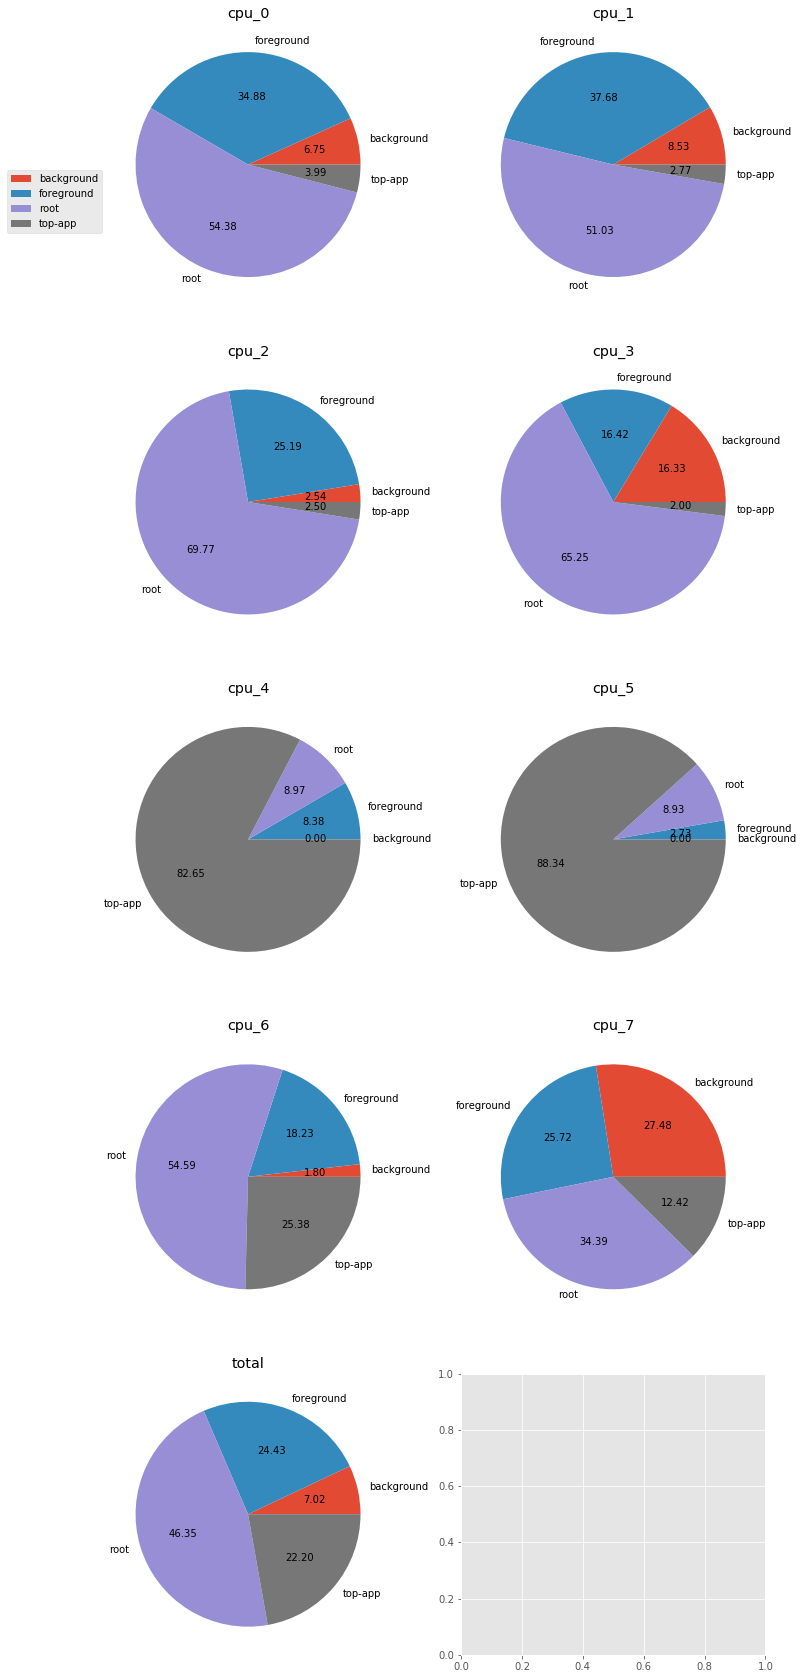

In [4]:
tr.analysis.residency.plot_cgroup('schedtune', idle=False)

Plot per-CPU breakdown WITH considering idle time (yellow slice)
------------------------------------------------------------

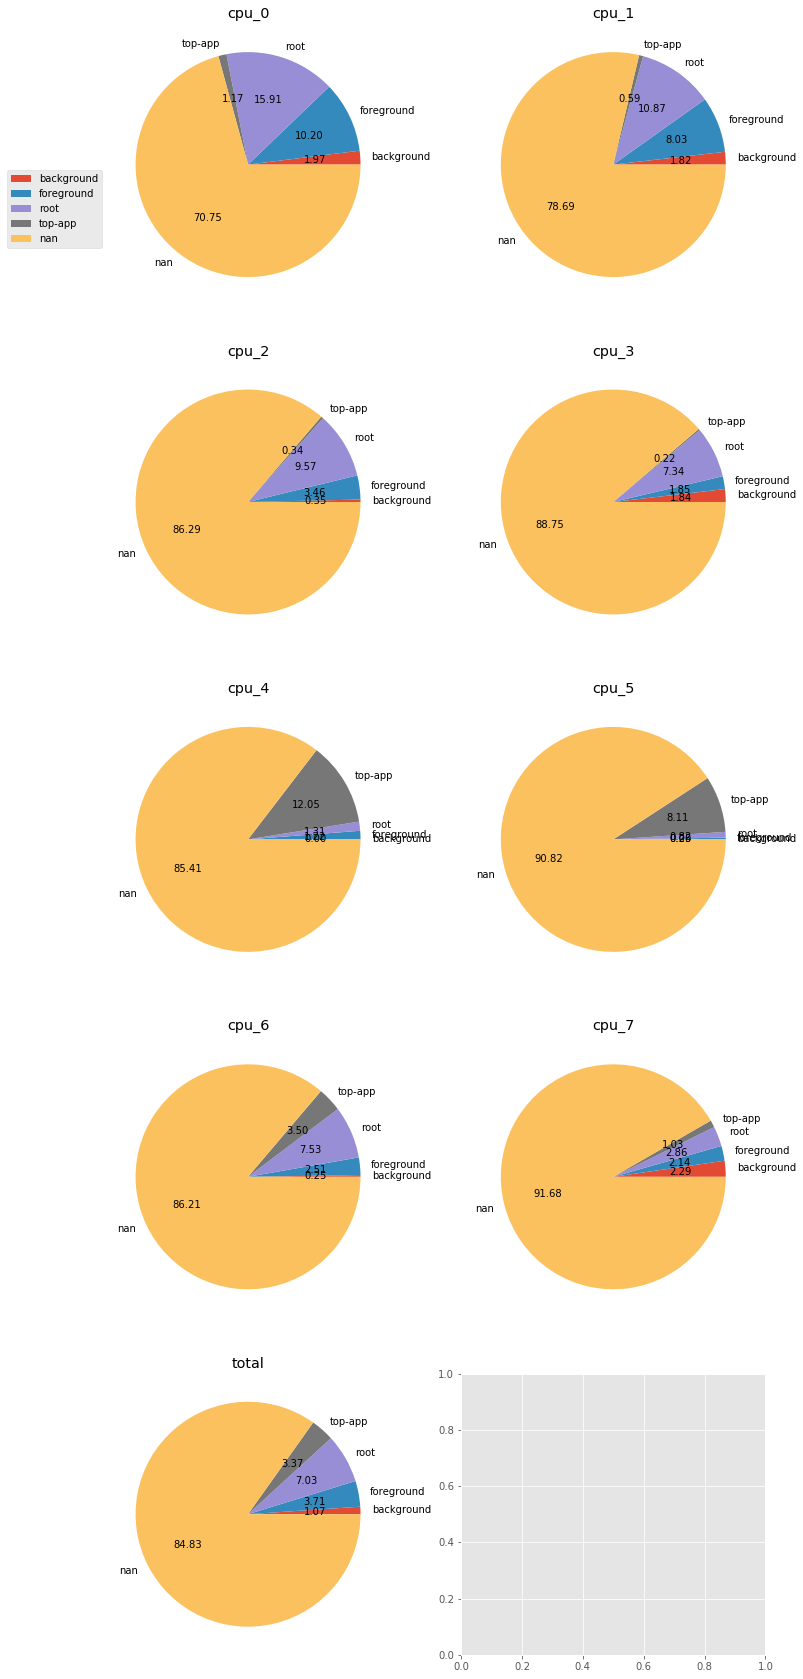

In [5]:
tr.analysis.residency.plot_cgroup('schedtune', idle=True)

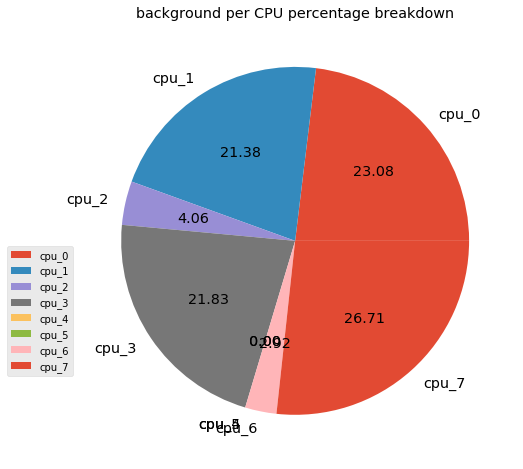

In [6]:
tr.analysis.residency.plot_cgroup('schedtune', cgroup='background')

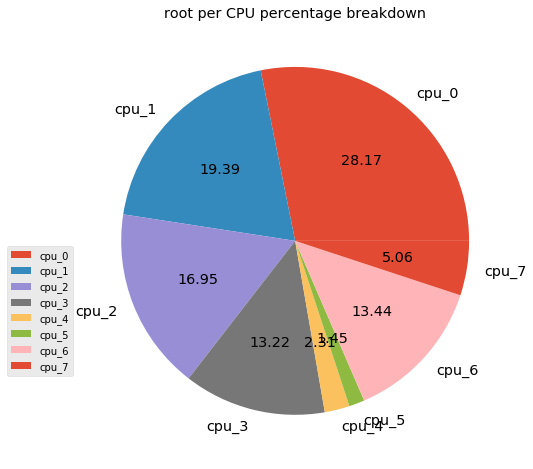

In [7]:
tr.analysis.residency.plot_cgroup('schedtune', cgroup='root')

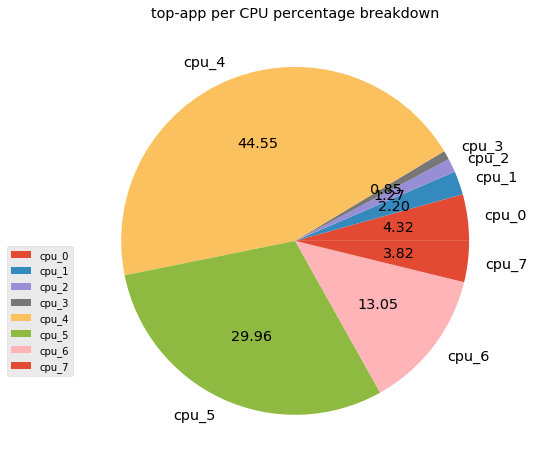

In [9]:
tr.analysis.residency.plot_cgroup('schedtune', cgroup='top-app')

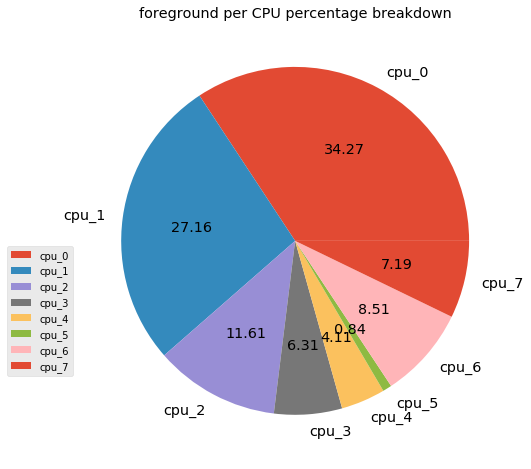

In [10]:
tr.analysis.residency.plot_cgroup('schedtune', cgroup='foreground')